In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import os 

In [ ]:
M = np.array([[2995,  2899,  4098,  2177,  4588],
              [2899,  2726,  3599,  1236,  2851],
              [4098,  3599,  3312,  5436,  5686],
              [2177,  1236,  5436,  1274,  3455],
              [4588,  2851,  5686,  3455,  4101]])



In [2]:
def get_ordered_subdirectories(directory):
    entries = os.listdir(directory)
    subdirs = [os.path.join(directory, entry) for entry in entries if os.path.isdir(os.path.join(directory, entry))]
    subdirs.sort()
    
    return subdirs

base = os.path.join(os.getcwd(),"ExperimentLogs")
ordered_subdirs = get_ordered_subdirectories(base)
last_exp = ordered_subdirs[-1] # Acces latest experiment run 
print(last_exp)

C:\Users\zogaj\PycharmProjects\MA\ExperimentLogs\2024-08-27-15-53-26


In [3]:
def load_all_pickles(directory:str, model: str, graphtype: str) -> list:
    """
    Iterates over all pickle files in the specified directory and loads them.
    
    :param directory: Path to the directory containing the pickle files
    :return: A list of loaded objects from the pickle files
    """
    loaded_objects = []
    final_path = os.path.join(directory, model, graphtype)
    
    # Iterate over all files in the directory
    for filename in os.listdir(final_path):
        if filename[0] == "o":
            file_path = os.path.join(final_path, filename)
            with open(file_path, 'rb') as file:
                loaded_objects.append(pickle.load(file))
    
    return loaded_objects
 

## Store the results of all Model/Scenario Combinations 

In [5]:
# Graphtype must match with the names specified in config.py 
res_gcn_noise = load_all_pickles(directory=last_exp,model="GCN",graphtype="noise")
res_gat_noise = load_all_pickles(last_exp, "GAT", "noise")
res_sage_noise = load_all_pickles(last_exp, "SAGE", "noise")

res_gcn_1 = load_all_pickles(directory=last_exp,model="GCN",graphtype="community_relevant")
res_gat_1 = load_all_pickles(last_exp, "GAT", "community_relevant")
res_sage_1 = load_all_pickles(last_exp, "SAGE", "community_relevant")

res_gcn_2 = load_all_pickles(directory=last_exp,model="GCN",graphtype="cluster_relevant")
res_gat_2 = load_all_pickles(last_exp, "GAT", "cluster_relevant")
res_sage_2 = load_all_pickles(last_exp, "SAGE", "cluster_relevant")

res_gcn_perfect = load_all_pickles(last_exp, "GCN", "perfect")
res_gat_perfect = load_all_pickles(last_exp, "GAT", "perfect")
res_sage_perfect = load_all_pickles(last_exp, "SAGE", "perfect")

# GCN and Gat yield the same 

# Plot 

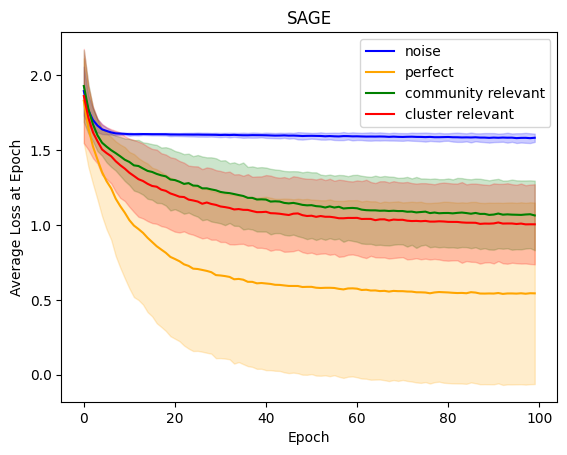

In [9]:
def plot_with_confidence_interval(target, color):
    """
    Plots figure for one Scenario. Used in a loop for final plot. 
    :param target: Results of the scenario.
    :param color: Color for scenario mapping. 
    :return: 
    """
 
    ys = np.array([lp["loss_track"] for lp in target])

    mean_ys = np.mean(ys, axis=0)
    std_ys = np.sqrt(np.var(ys, axis=0))

    ci_upper = mean_ys + 1.96 * std_ys
    ci_lower = mean_ys - 1.96 * std_ys
    x = np.arange(len(mean_ys))

    plt.plot(x, mean_ys, color=color)
    plt.fill_between(x, ci_lower, ci_upper, color=color, alpha=0.2)
    # plt.axvline(x=avg_final_epoch, color=color, linestyle='--')


#targets = [res_gcn_noise, res_gcn_perfect, res_gcn_1, res_gcn_2] 
#targets = [res_gat_noise, res_gat_perfect, res_gat_1, res_gat_2] 
targets = [res_sage_noise, res_sage_perfect, res_sage_1, res_sage_2] 

labels = ['noise', 'perfect', "community relevant", "cluster relevant"]  
colors = ['blue', 'orange', 'green', "red"] 


plt.figure()
for target, label, color in zip(targets, labels, colors):
    plot_with_confidence_interval(target, color)
    plt.plot([], [], color=color, label=label)  


plt.xlabel('Epoch')
plt.ylabel('Average Loss at Epoch')
plt.title('SAGE')
plt.legend(loc='upper right')
plt.show()
